# Statistical Analysis

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

df = pd.read_csv(url)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
df.shape

(887, 8)

In [8]:
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["figure.dpi"] = 100

## Descriptive Statistical Analysis (EDA)

### Frequency Distribution

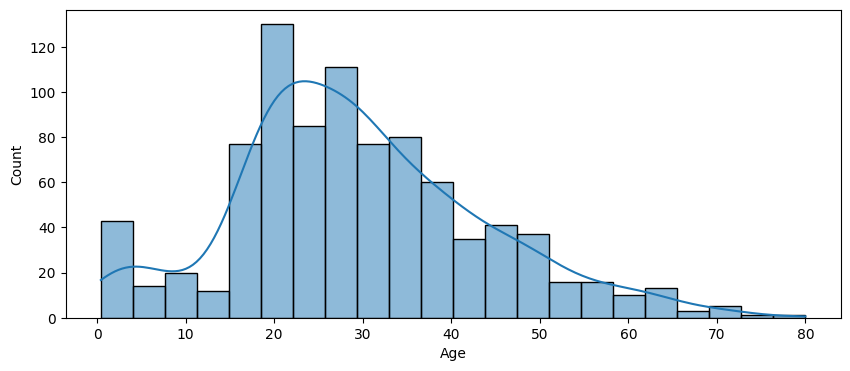

In [9]:
sns.histplot(data=df, x=df['Age'], kde=True);

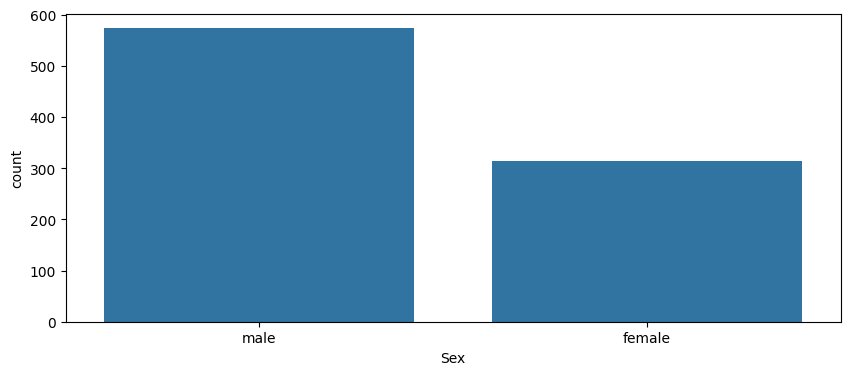

In [10]:
sns.countplot(data=df, x=df['Sex']);

### Dispersion or Measure of Variability

In [11]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


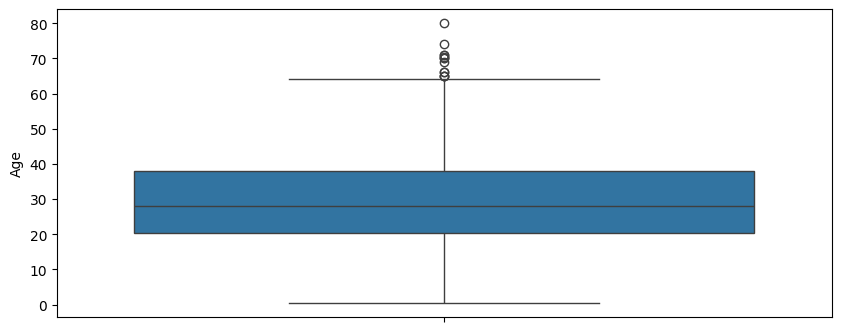

In [12]:
sns.boxplot(data=df, y = df['Age']);

In [13]:
# Multi-variate analysis

df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,27.719745,13.834740,0.75,18.0,27.0,36.0,63.0
male,573.0,30.431361,14.197273,0.42,21.0,28.0,38.0,80.0


### Correlation and Covariance

In [14]:
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})

In [15]:
corr_matrix = df.corr(numeric_only=True)

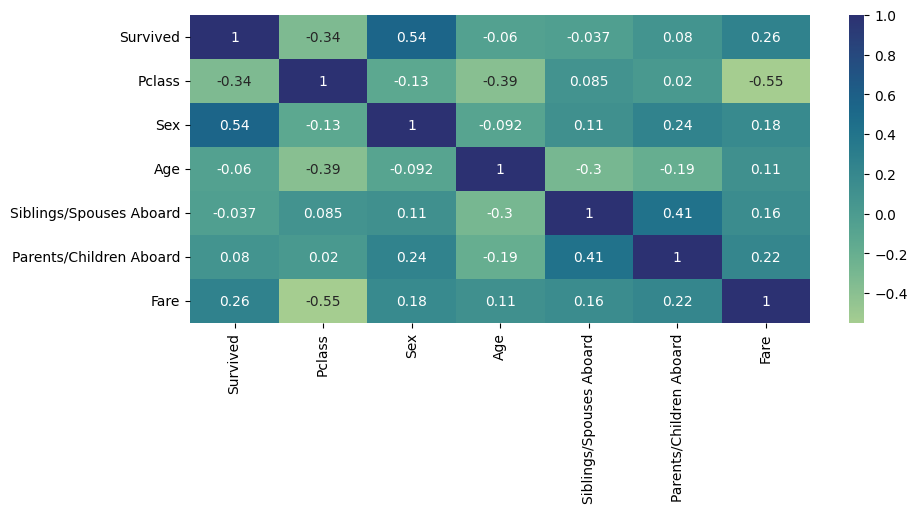

In [16]:
sns.heatmap(data=corr_matrix, annot=True, cmap='crest');

## Inferential Statistical Analysis

- Making inference or prediction about the populations 
- Making and testing hypothesis about the populations

### Sampling

Sampling is done when there is large population. The assumption is that if the distribution of sample is identical to the population then we could make assumptions about the population based on the sample’s test


While working with a sample two terms are used to represent sample and population metrics:

- Statistics: It is a measure or metric of sample. e.g. smaple age.
- Parameter: It is a measure or metric of a population. e.g. population age.

One major problem that could be found in sampling is that the mean and variance of sample might not ressemble the population. It is often called as sample error.


### Estimation

While working with prediction/hypothesis in inferential analysis, we often have to deal with two types of estimates:

- Point Estimation: It is simply a single value estimation for example the sample mean age is equal to the population mean age.
    
- Interval Estimation: This estimation is based on finding a value in some range. For example the confidence interval is used in tests like Chi Square, t-test etc. In above example of Titanic dataset we could make an estimation like, the difference between sample mean age and population mean age is not more than 5%.

### Test

There are lots of test based upon the nature of estimation, calculation and prediction but all of those can be divided into 3 categories:

- Comparison Test
- Correlation Test
- Regression Test

Based on parameters, we can also categorize tests into two groups:

- Parametric Test: Parametric tests are those in which we work with parameters like mean and variance. One example of this test is t-test.

- Non Parametric Test: These tests are non parametric because does not use parameters in the hypothesis. One example is Mann Whitney U test.

Based on the measurement (Nominal, Ordinal, Interval and Ratio) of the data we can choose bset test for our data.


### Terms Widely Used in Testing

- Confidence Interval: Confidence interval is all about giving some room for the error. Which is often used with tests. For example, if we are trying to make a test where we have set our hypothesis that the average mean of sample lies within the range 25 to 35 then asume that our sample mean was calculated to be 28 while population mean is 30. Then we will still be selecting the sample mean.

- Confidence Level: It sounds similar to confidence interval but no it is not. But these two terms are related to each other. Confidence level tells us how much probability is there that the sample statistics or estimated parameter lies within the confidence interval. For example, if we set the confidence level to 5%, then we will be claiming that if there are 100 tests done, at max 5 will be predicting wrong prediction. Or in other words, out of 100 tests, 95 tests will have the estimated value lie within the confidence interval.
    
- Hypothesis: As the term suggests, hypothesis is something that we are assuming to happen. In Hypothesis testing, we will have different hypothesis against the default or null hypothesis. Those hypothesis against the default are known as alternative hypothesis.



### T-test

“The t-test is any statistical hypothesis test in which the test statistic follows a Student’s t-distribution under the null hypothesis.”

This test is done in order to determine whether there is significant difference between means of two groups, mostly between sample and population.

In [17]:
from scipy.stats import ttest_ind, t

In [19]:
sample1 = df['Age'].sample(500)
sample2 = df['Age'].sample(500)

In [27]:
t_stat, p = ttest_ind(sample1, sample2)
alpha = 0.05

# Degree of freedom
dof = len(sample1) + len(sample2) - 2

# Calculate critical value
cv = t.ppf(1.0 - alpha, dof)

In [28]:
print(f"Means of each sample is: {sample1.mean(), sample2.mean()}")

print('t=%.3f, p=%.3f' % (t_stat, p))

print(f"Comparing statistics with alpha={alpha}, critical value={cv}, p={p}, t-stat={stat}.")

print("\nUsing t_stat.")
if abs(t_stat) <= cv:
	print('Unable to reject the null hypothesis.')
else:
	print('Reject the null hypothesis that the means are equal.')
 
print("\nUsing p value.")
if p > alpha:
	print('Unable to reject the null hypothesis.')
else:
	print('Reject the null hypothesis that the means are equal.')

Means of each sample is: (29.668680000000002, 29.42966)
t=0.273, p=0.785
Comparing statistics with alpha=0.05, critical value=1.6463818766348755, p=0.7849610701339012, t-stat=0.27293314735728075.

Using t_stat.
Unable to reject the null hypothesis.

Using p value.
Unable to reject the null hypothesis.


### ANOVA Test

ANOVA means Analysis of Variance. This test is used when we have to compare statistics between two or more samples. If we have two sample, we will use t-test.

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
df.groupby(by="Pclass")['Age'].mean().rename("mean_age").reset_index()

,Pclass,mean_age
0,1,38.788981
1,2,29.868641
2,3,25.188747


In [41]:
tdf = df.groupby(by="Pclass")['Age'].mean().rename("mean_age").reset_index()

model = ols('mean_age' + '~' + "Pclass", data = tdf).fit()

In [43]:
result_anova = sm.stats.anova_lm(model)
result_anova

,df,sum_sq,mean_sq,F,PR(>F)
Pclass,1.0,92.483183,92.483183,30.859642,0.113386
Residual,1.0,2.996897,2.996897,NaN,NaN


### Pearson Correlation Test

In [45]:
df['Fare'].corr(df['Age'])

0.1123286369994161

Weak positive correlation

### Spearman's Correlation Test

Pearson correlation assumes the data is normally distributed. However, Spearman does not make any assumption on the distribution of the data.

In [46]:
df['Fare'].corr(df['Age'], method='spearman')

0.15606180426955454

### Chi-square Test

The Chi-square test is a non-parametric statistic, also called a distribution free test. 

Non-parametric tests should be used when any one of the following conditions pertains to the data:

- The level of measurement of all the variables is nominal or ordinal.
- The sample sizes of the study groups are unequal; for the χ2 the groups may be of equal size or unequal size whereas some parametric tests require groups of equal or approximately equal size.
- The original data were measured at an interval or ratio level, but violate one of the following assumptions of a parametric test:
    - The distribution of the data was seriously skewed or kurtotic (parametric tests assume approximately normal distribution of the dependent variable), and thus the researcher must use a distribution free statistic rather than a parametric statistic.
    - The data violate the assumptions of equal variance or homoscedasticity.
    - For any of a number of reasons (1), the continuous data were collapsed into a small number of categories, and thus the data are no longer interval or ratio.


Note:

- Null Hypothesis(H0): Two variables are not dependent. (no association between the two variables)

- Alternate Hypothesis(H1): There is relationship between variables.

- If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
- If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

- If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
- If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


In [49]:
ct = pd.crosstab(df['Sex'], df['Survived'], margins= True, margins_name="Total")

In [50]:
ct

Survived,0,1,Total
Sex,,,
0,464,109,573
1,81,233,314
Total,545,342,887


In [55]:
from scipy import stats

chi_square = 0

rows = df['Sex'].unique()
columns = df['Survived'].unique()

for i in columns:
    for j in rows:
        O = ct[i][j]
        E = ct[i]['Total']*ct['Total'][j] / ct['Total']['Total']
        chi_square += (O-E)**2/E

p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
alpha = 0.05 

if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected"
else:
    conclusion = "Failed to reject null hypothesis"

print(f"Chi-square score is {chi_square} and p value is {p_value}")

print(conclusion)

Chi-square score is 260.71530379938315 and p value is 0.0
Null Hypothesis is rejected
